### Housing Price Estimation

Here, we will train a machine learning model to predict housing price based on its total area (in sq ft). We will use univariate linear regression to train the model.
- **Feature**: Area of house (measured in square foot)
- **Target**: Price of the house (in $)

The feature values will be normalized using `z-score normalization`.
We will follow the `90-10` rule for segregating the dataset into training and validation sets i.e., 90% of the data will be used for training the model and 10% of the dataset will be used for validating the trained model.

**Note:** Model has been trained with L2-regularization to avoid overfitting.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from models import LinearRegression
from utils import Normalization

In [2]:
def process_data():
    df = pd.read_csv('./datasets/housing.csv')
    total_rows = df.shape[0]
    train_rows = math.ceil(0.9 * total_rows)
    training_set = df[:train_rows]
    validation_set = df[train_rows:]
    print(f"There are {training_set.shape[0]} row(s) in the training set.")
    print(f"There are {validation_set.shape[0]} row(s) in the validation set.")
    x_tr = training_set['area'].to_numpy(dtype=float)
    y_tr = training_set['price'].to_numpy(dtype=float)
    x_tr = np.reshape(x_tr, (x_tr.shape[0], 1))
    y_tr = np.reshape(y_tr, (y_tr.shape[0], 1))

    x_val = validation_set['area'].to_numpy(dtype=float)
    y_val = validation_set['price'].to_numpy(dtype=float)
    x_val = np.reshape(x_val, (x_val.shape[0], 1))
    y_val = np.reshape(y_val, (y_val.shape[0], 1))

    return x_tr, y_tr, x_val, y_val

There are 491 row(s) in the training set.
There are 54 row(s) in the validation set.


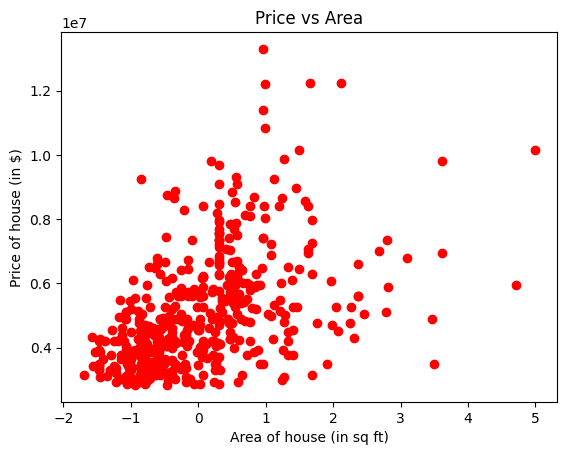

In [3]:
x_train, y_train, x_validate, y_validate = process_data()
m, n = x_train.shape
x_norm = Normalization.zscore(x_train)

plt.plot(x_norm, y_train, 'ro')
plt.title("Price vs Area")
plt.xlabel("Area of house (in sq ft)")
plt.ylabel("Price of house (in $)")
plt.show()

Model parameters: w = [[704896.5871193]], b = 4097348.9612834654 | Minimum cost value = 3,713,736,528,992.244


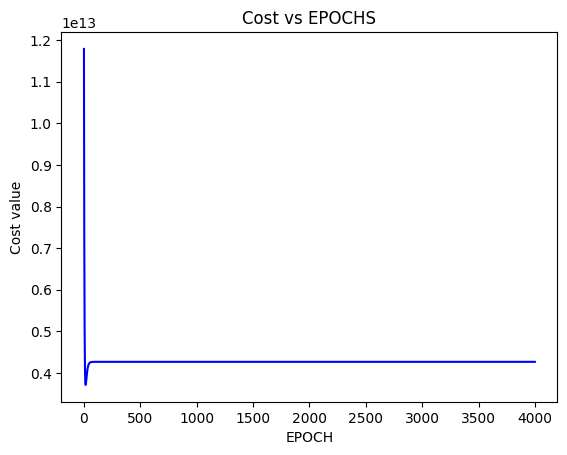

In [4]:
model = LinearRegression(0.1, 4000, 8.3)
cost_values = model.train_gd(x_norm, y_train)
print(f"Model parameters: w = {model.w_final}, b = {model.b_final} | Minimum cost value = {model.cost_final:,}")

plt.plot(cost_values, 'b')
plt.title("Cost vs EPOCHS")
plt.xlabel("EPOCH")
plt.ylabel("Cost value")
plt.show()

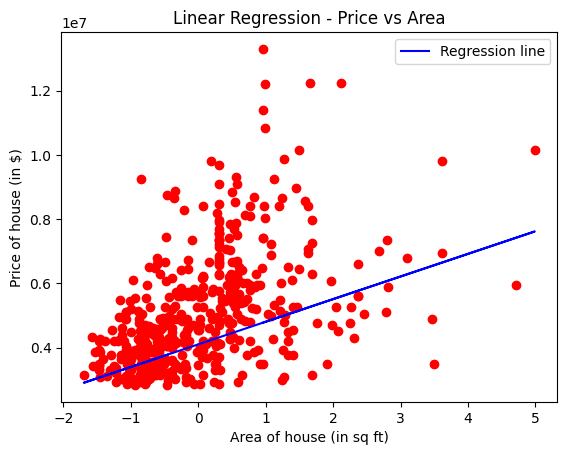

In [5]:
y_pred_hat = np.dot(x_norm, model.w_final) + model.b_final

plt.plot(x_norm, y_train, 'ro')
plt.plot(x_norm, y_pred_hat, 'b', label='Regression line')
plt.title("Linear Regression - Price vs Area")
plt.xlabel("Area of house (in sq ft)")
plt.ylabel("Price of house (in $)")
plt.legend()
plt.show()

In [6]:
m_validate, n_validate = x_validate.shape
xv_norm = Normalization.zscore(x_validate)

cost_validate = model.validate(xv_norm, y_validate)
print(f"The minimum cost obtained from training set is {model.cost_final:,}")
print(f"The cost value obtained from validation set is {cost_validate:,}.")

if cost_validate > model.cost_final:
    percent_increase = ((cost_validate / model.cost_final) * 100) - 100
    print(f"Validation cost is {percent_increase:.2f}% higher than the training cost.")
else:
    percent_increase = ((model.cost_final / cost_validate) * 100) - 100
    print(f"Training cost is {percent_increase:.2f}% higher than the validation cost.")

The minimum cost obtained from training set is 3,713,736,528,992.244
The cost value obtained from validation set is 3,790,299,506,620.215.
Validation cost is 2.06% higher than the training cost.


In [7]:
final_pred = model.predict(xv_norm)
m_final = final_pred.shape[0]
final_pred = final_pred.reshape((m_final, 1))
print_count = 0
if m_final > 10:
    print_count = 10
else:
    print_count = m_final
for i in range(m_final):
    print(f"y = {y_validate[i, 0]:,}, y_hat = {final_pred[i, 0]:,}")

y = 2,835,000.0, y_hat = 3,559,889.6094475025
y = 2,800,000.0, y_hat = 3,566,684.1324485894
y = 2,800,000.0, y_hat = 4,456,766.645590952
y = 2,730,000.0, y_hat = 6,386,411.177899584
y = 2,730,000.0, y_hat = 4,483,944.737595298
y = 2,695,000.0, y_hat = 4,483,944.737595298
y = 2,660,000.0, y_hat = 4,439,100.885788126
y = 2,660,000.0, y_hat = 3,125,040.1373779518
y = 2,660,000.0, y_hat = 4,232,547.38655509
y = 2,660,000.0, y_hat = 3,668,601.9774648906
y = 2,660,000.0, y_hat = 3,417,204.6264246814
y = 2,660,000.0, y_hat = 4,130,629.541538788
y = 2,660,000.0, y_hat = 4,483,944.737595298
y = 2,653,000.0, y_hat = 3,930,191.1130067296
y = 2,653,000.0, y_hat = 4,483,944.737595298
y = 2,604,000.0, y_hat = 3,743,341.7304768446
y = 2,590,000.0, y_hat = 4,212,163.817551829
y = 2,590,000.0, y_hat = 4,755,725.657638768
y = 2,590,000.0, y_hat = 4,212,163.817551829
y = 2,520,000.0, y_hat = 3,722,958.1614735844
y = 2,520,000.0, y_hat = 3,926,793.851506186
y = 2,520,000.0, y_hat = 3,804,492.4374866253
y 